# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities

['barcelos',
 'vaitupu',
 'jamestown',
 'ushuaia',
 'tarudant',
 'attawapiskat',
 'albany',
 'barentsburg',
 'east london',
 'galiwinku',
 'kodiak',
 'barrow',
 'baghdad',
 'san patricio',
 'cayenne',
 'kapaa',
 'nikolskoye',
 'hobart',
 'nanortalik',
 'tsihombe',
 'qom',
 'vaini',
 'bafq',
 'puerto ayora',
 'rawannawi',
 'rikitea',
 'kaitangata',
 'kavieng',
 'new norfolk',
 'nizhneyansk',
 'kuche',
 'pandharpur',
 'hilo',
 'olafsvik',
 'yellowknife',
 'kuruman',
 'sentyabrskiy',
 'san miguel',
 'yilan',
 'mataura',
 'khor',
 'gornopravdinsk',
 'severo-kurilsk',
 'roebourne',
 'cherskiy',
 'hamilton',
 'upernavik',
 'stromness',
 'atuona',
 'guane',
 'thompson',
 'rio gallegos',
 'pingzhuang',
 'oktyabrskoye',
 'quatre cocos',
 'busselton',
 'tiksi',
 'lakatoro',
 'berovo',
 'fort saint john',
 'itupiranga',
 'college',
 'dikson',
 'cape town',
 'hithadhoo',
 'akdepe',
 'hasaki',
 'touros',
 'zeya',
 'kruisfontein',
 'poretskoye',
 'sitka',
 'punta arenas',
 'skalistyy',
 'port elizab

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + "vaini").json()
response

{'coord': {'lon': 74.49, 'lat': 15.34},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 73.89,
  'pressure': 1013,
  'humidity': 88,
  'temp_min': 71.6,
  'temp_max': 75.2},
 'visibility': 6000,
 'wind': {'speed': 5.82, 'deg': 270},
 'clouds': {'all': 20},
 'dt': 1566660877,
 'sys': {'type': 1,
  'id': 9229,
  'message': 0.0084,
  'country': 'IN',
  'sunrise': 1566607723,
  'sunset': 1566652850},
 'timezone': 19800,
 'id': 1273574,
 'name': 'Vaini',
 'cod': 200}

In [5]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
counter = 1

print("Beginning Data Retrieval")
print("--------------------------------")

for city in cities:

    response = requests.get(query_url + city).json()

    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} | {city}")
        counter+=1
        time.sleep(1)
    except KeyError:
        print("City not found. Skipping...")

Beginning Data Retrieval
--------------------------------
Processing Record 1 | barcelos
City not found. Skipping...
Processing Record 2 | jamestown
Processing Record 3 | ushuaia
City not found. Skipping...
City not found. Skipping...
Processing Record 4 | albany
City not found. Skipping...
Processing Record 5 | east london
City not found. Skipping...
Processing Record 6 | kodiak
Processing Record 7 | barrow
Processing Record 8 | baghdad
Processing Record 9 | san patricio
Processing Record 10 | cayenne
Processing Record 11 | kapaa
Processing Record 12 | nikolskoye
Processing Record 13 | hobart
Processing Record 14 | nanortalik
City not found. Skipping...
Processing Record 15 | qom
Processing Record 16 | vaini
Processing Record 17 | bafq
Processing Record 18 | puerto ayora
City not found. Skipping...
Processing Record 19 | rikitea
Processing Record 20 | kaitangata
Processing Record 21 | kavieng
Processing Record 22 | new norfolk
City not found. Skipping...
City not found. Skipping...
Pr

Processing Record 218 | miraflores
Processing Record 219 | pala
Processing Record 220 | mezhdurechensk
Processing Record 221 | buala
Processing Record 222 | laguna
Processing Record 223 | guasdualito
Processing Record 224 | fairbanks
Processing Record 225 | anori
Processing Record 226 | caxito
Processing Record 227 | galesong
Processing Record 228 | christchurch
Processing Record 229 | sao joao de pirabas
Processing Record 230 | lardos
Processing Record 231 | kajaani
Processing Record 232 | namatanai
Processing Record 233 | hailey
Processing Record 234 | airai
Processing Record 235 | liwale
Processing Record 236 | baymak
Processing Record 237 | pasighat
Processing Record 238 | ostrovnoy
Processing Record 239 | burias
Processing Record 240 | high level
Processing Record 241 | rio grande
Processing Record 242 | teavaro
City not found. Skipping...
Processing Record 243 | shingu
Processing Record 244 | camacari
Processing Record 245 | beyneu
Processing Record 246 | bambous virieux
Processi

Processing Record 447 | tabou
Processing Record 448 | taltal
City not found. Skipping...
Processing Record 449 | sangar
Processing Record 450 | nantucket
Processing Record 451 | palmer
Processing Record 452 | okhotsk
Processing Record 453 | bechem
Processing Record 454 | kendari
Processing Record 455 | kamenka
Processing Record 456 | ekhabi
Processing Record 457 | griffith
Processing Record 458 | port hardy
City not found. Skipping...
Processing Record 459 | burgeo
Processing Record 460 | yangambi
Processing Record 461 | kaeo
Processing Record 462 | pihani
Processing Record 463 | raunheim
Processing Record 464 | abha
Processing Record 465 | ponta delgada
Processing Record 466 | soloneshnoye
Processing Record 467 | bassum
Processing Record 468 | olinda
Processing Record 469 | kununurra
Processing Record 470 | talisay
Processing Record 471 | zelenoborskiy
Processing Record 472 | leeton
Processing Record 473 | wenatchee
City not found. Skipping...
Processing Record 474 | dakar
Processing 

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [7]:
# Save data frame to CSV
#weather_data to_csv
weather_data_output = "Output_CSV/weather_data.csv"


# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barcelos,0,BR,1566660847,51,-0.97,-62.93,91.08,3.22
1,Jamestown,0,AU,1566660879,94,-33.21,138.60,39.78,5.14
2,Ushuaia,40,AR,1566660853,65,-54.81,-68.31,46.40,3.36
3,Albany,40,US,1566660881,60,42.65,-73.75,70.00,9.17
4,East London,0,ZA,1566660882,44,-33.02,27.91,75.20,3.36


In [8]:
df = pd.DataFrame(weather_data)
export_csv = df.to_csv("weather.csv"), r'C:\Users\sobai\Zewari_DataBootcamp_HW\Homework_6_API JSON\export_dataframe.csv'
html = df.to_html('citydata.html')

In [9]:
csv_data = pd.read_csv("weather.csv")
csv_data

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Barcelos,0,BR,1566660847,51,-0.97,-62.93,91.08,3.22
1,1,Jamestown,0,AU,1566660879,94,-33.21,138.60,39.78,5.14
2,2,Ushuaia,40,AR,1566660853,65,-54.81,-68.31,46.40,3.36
3,3,Albany,40,US,1566660881,60,42.65,-73.75,70.00,9.17
4,4,East London,0,ZA,1566660882,44,-33.02,27.91,75.20,3.36
5,5,Kodiak,75,US,1566660883,73,39.95,-94.76,72.00,11.41
6,6,Barrow,100,AR,1566660884,55,-38.31,-60.23,59.94,14.29
7,7,Baghdad,0,IQ,1566660886,16,33.30,44.38,109.40,4.70
8,8,San Patricio,0,PY,1566660887,54,-26.98,-56.83,71.28,5.08
9,9,Cayenne,20,GF,1566660888,59,4.94,-52.33,89.60,6.93


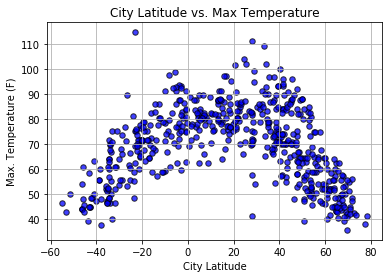

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=30, color='blue',  edgecolor = 'black', label = 'Lat v. Temp', alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save the figure
plt.savefig('City Latitude_vs_Max Temprature.png')

# Show plot
plt.show()


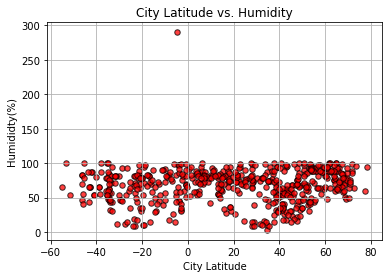

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=30, color='red',  edgecolor = 'black', label = 'Lat v. Temp', alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humididty(%)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save the figure
plt.savefig('City Latitude_vs_Humidity.png')

# Show plot
plt.show()

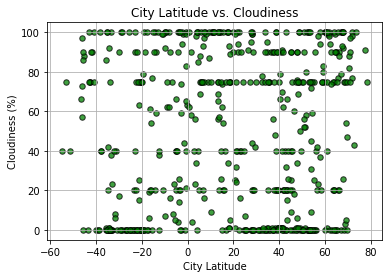

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=30, color='green',  edgecolor = 'black', label = 'Lat v. Temp', alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save the figure
plt.savefig('City Latiutude vs Cloudiness.png')

# Show plot
plt.show()

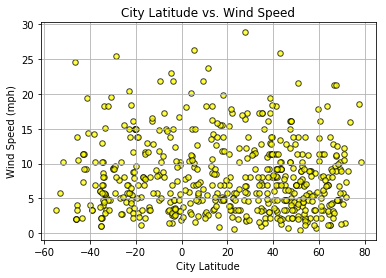

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=30, color='yellow',  edgecolor = 'black', label = 'Lat v. Temp', alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save the figure
plt.savefig('City Latitude vs Wind Speed.png')

# Show plot
plt.show()